Nama : Rizqi Darmawan
Nim : 3333210044
Kelas D

his dataset was inspired by the classical dataset House Prices. Here you can find thousands of records with the following information.
The dataset was extracted from a Portuguese website in March 21, 2021.

Locations -> neighbourhood, city, and state;
Rooms -> how many rooms;
Price -> price value in € (Euro).
Area -> area that is available in the house.
Bathrooms -> how many bathrooms in the house.
Condition -> house's condition, for example: New, Used, Renewed, and etc.
AdsType -> determine the ads type, for example: to sell, to rent, or to vacation rent.
ProprietyType -> House or Apartament for example.

https://www.kaggle.com/datasets/mcarujo/portugal-proprieties-rent-buy-and-vacation

Mengimport Package yang diperlukan



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Mengimport Dataset

In [62]:
!gdown --id 1rCtOLbL6En0wx9xvbllP2z8TNn8_BJOV


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rCtOLbL6En0wx9xvbllP2z8TNn8_BJOV
To: /content/portugal_ads_proprieties.csv
100% 4.90M/4.90M [00:00<00:00, 108MB/s]


In [63]:
dataset = pd.read_csv('portugal_ads_proprieties.csv')
dataset

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,Rent,House
1,"Espinho, Aveiro",2,1100.0,146.7,2.0,Renovated,Rent,House
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,Rent,House
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,Rent,House
4,"Ílhavo (São Salvador), Ílhavo, Aveiro",4,2000.0,258.0,3.0,Used,Rent,House
...,...,...,...,...,...,...,...,...
62840,"Caminha (Matriz) e Vilarelho, Caminha, Viana ...",6,1253.0,300.0,4.0,NaN,Vacation,House
62841,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,New,Vacation,House
62842,"Cunha, Paredes de Coura, Viana do Castelo",3,1265.0,150.0,2.0,Used,Vacation,House
62843,"Chafé, Viana do Castelo",3,NaN,130.0,2.0,Used,Vacation,House


Exploratory Data

In [64]:
dataset.shape

(62845, 8)

In [65]:
dataset.columns

Index(['Location', 'Rooms', 'Price', 'Area', 'Bathrooms', 'Condition',
       'AdsType', 'ProprietyType'],
      dtype='object')

In [66]:
dataset.dtypes

Location          object
Rooms             object
Price            float64
Area             float64
Bathrooms        float64
Condition         object
AdsType           object
ProprietyType     object
dtype: object

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62845 entries, 0 to 62844
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       62845 non-null  object 
 1   Rooms          62845 non-null  object 
 2   Price          61738 non-null  float64
 3   Area           62845 non-null  float64
 4   Bathrooms      50189 non-null  float64
 5   Condition      37963 non-null  object 
 6   AdsType        62845 non-null  object 
 7   ProprietyType  62845 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.8+ MB


In [68]:
dataset.nunique()

Location         2689
Rooms              11
Price            2994
Area             6873
Bathrooms           5
Condition           6
AdsType             3
ProprietyType       1
dtype: int64

Handling Missing Value

In [69]:
dataset.isnull().sum()

Location             0
Rooms                0
Price             1107
Area                 0
Bathrooms        12656
Condition        24882
AdsType              0
ProprietyType        0
dtype: int64

Data Visualization

Melihat tipe data dari setiap data

In [70]:
dataset['Price'].dtypes

dtype('float64')

In [71]:
dataset['Bathrooms'].dtypes

dtype('float64')

In [72]:
dataset['Condition'].dtypes

dtype('O')

menggunakan imputer untuk menyelesaikan masalah missing value untuk numerical data

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [75]:
imputer = imputer.fit(dataset[['Price', 'Bathrooms', ]])
imputer

SimpleImputer()

In [76]:
dataset[['Price', 'Bathrooms']] = imputer.transform(dataset[['Price', 'Bathrooms']])
dataset.isnull().sum()

Location             0
Rooms                0
Price                0
Area                 0
Bathrooms            0
Condition        24882
AdsType              0
ProprietyType        0
dtype: int64

In [77]:
#Mendeskripsikan Dataset
#dapat melihat data yang ada seperti nilai mean, minimum, dan max
dataset.describe()

,Price,Area,Bathrooms
count,6.284500e+04,6.284500e+04,62845.000000
mean,1.848887e+07,2.117675e+04,2.652414
std,4.432227e+09,5.185735e+06,0.971094
min,1.150000e+02,1.000000e+00,1.000000
25%,1.600000e+05,1.200000e+02,2.000000
50%,3.300000e+05,1.800000e+02,2.652414
75%,5.500000e+05,2.580000e+02,3.000000
max,1.111111e+12,1.300000e+09,21.000000


<Axes: >

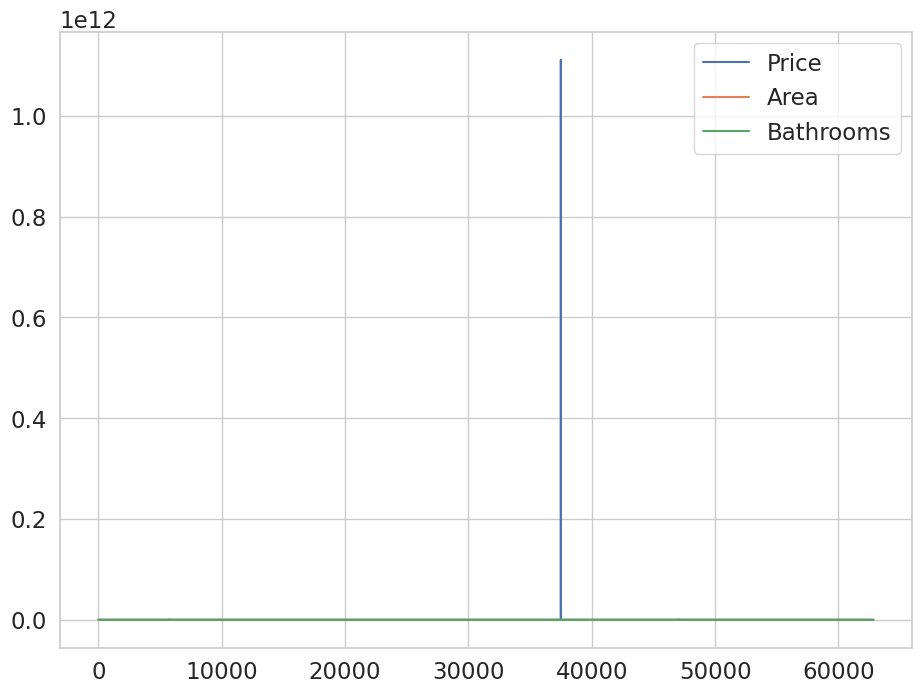

In [78]:
#plot
#Dapat dilihat distribusi data dari data yang ada
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

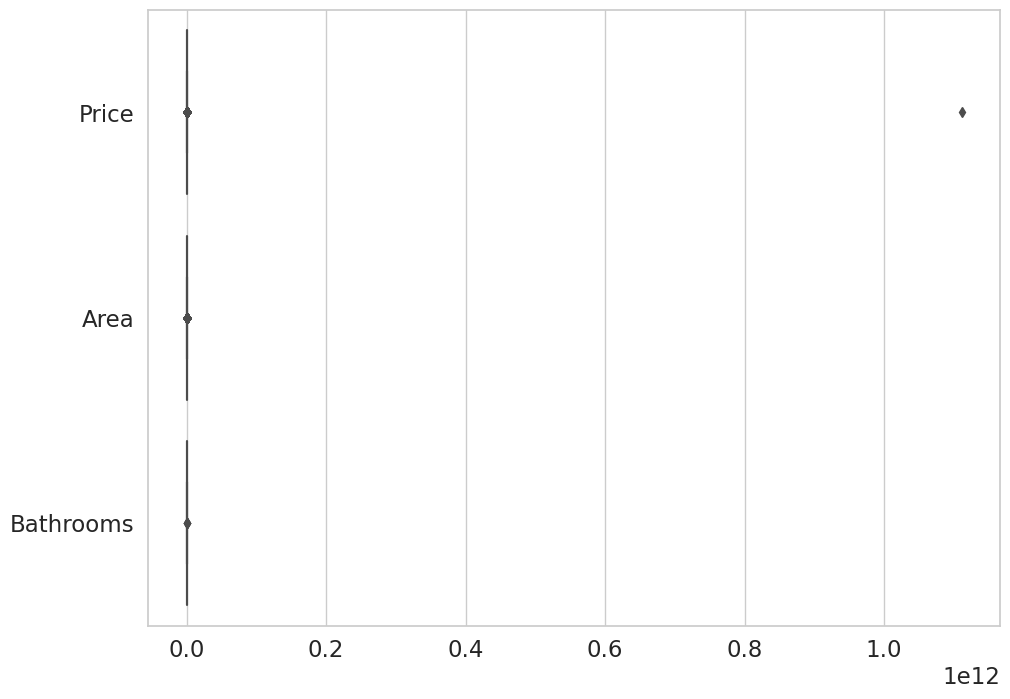

In [79]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

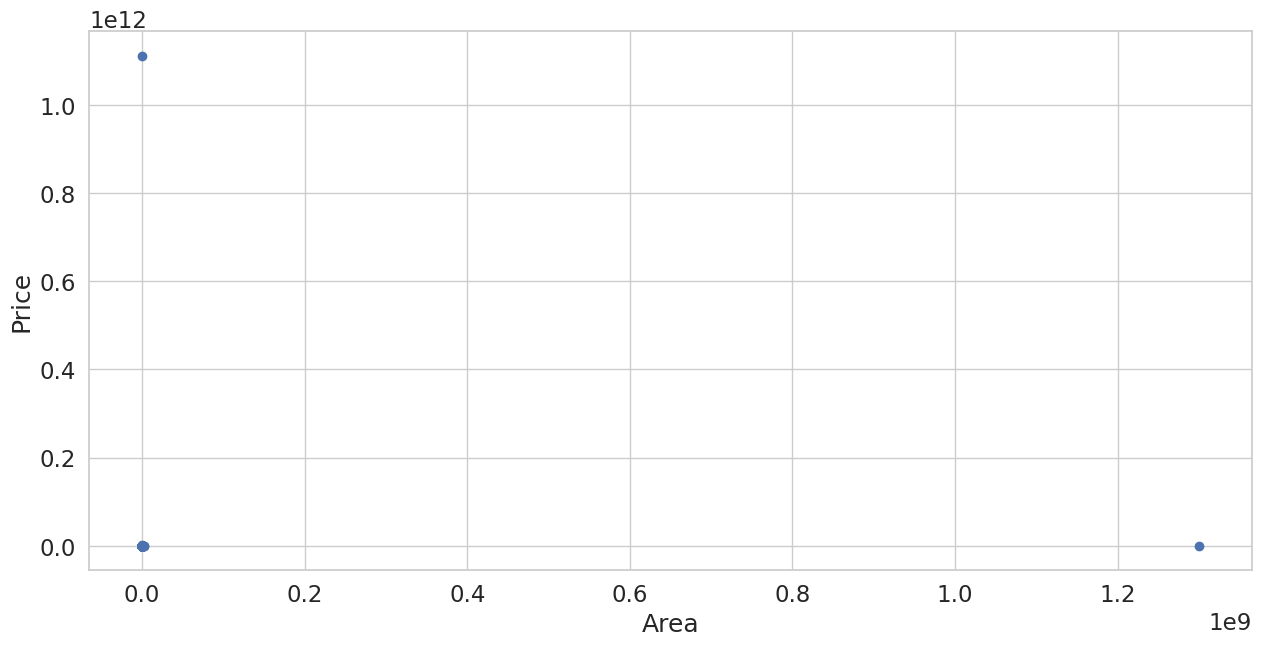

In [82]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Area'], dataset['Price'])
 
# x-axis label
ax.set_xlabel('Area')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

Untuk menentukan nilai basis outlier didefinisikan di atas dan di bawah dataset rentang normal yaitu Batas atas dan bawah, tentukan batas atas dan bawah (nilai 1,5*IQR dianggap):

In [83]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Area'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Area'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (62845, 8)


In [84]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Area'] > upper].index
outliers_lower = dataset[dataset['Area'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (59581, 8)


In [85]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Price'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Price'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (59581, 8)


In [86]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Price'] > upper].index
outliers_lower = dataset[dataset['Price'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (54897, 8)


<Axes: >

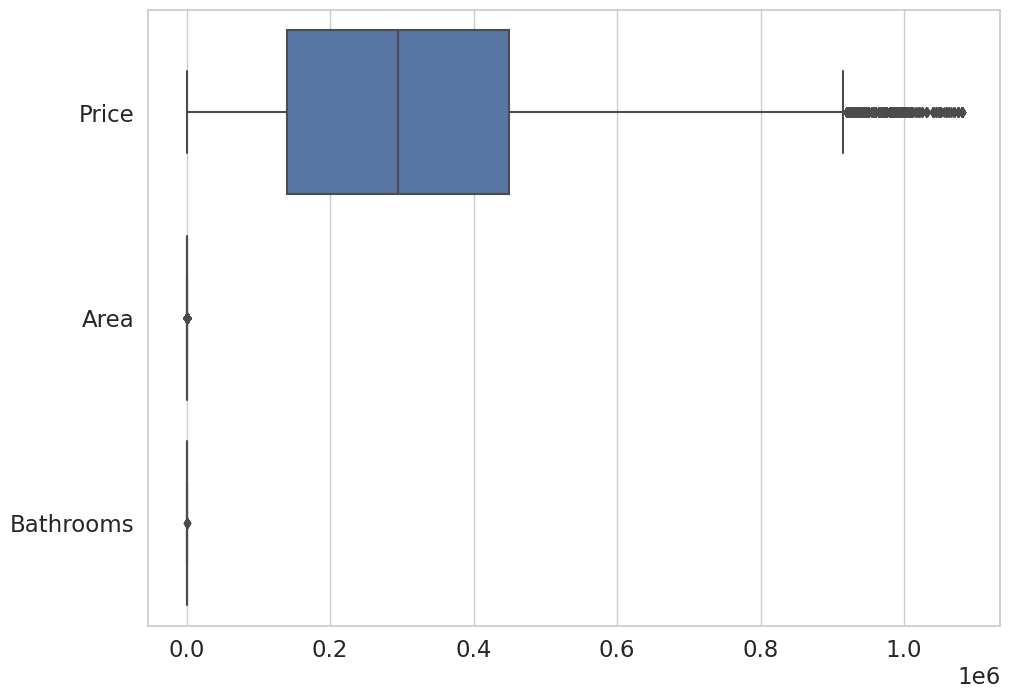

In [87]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h")

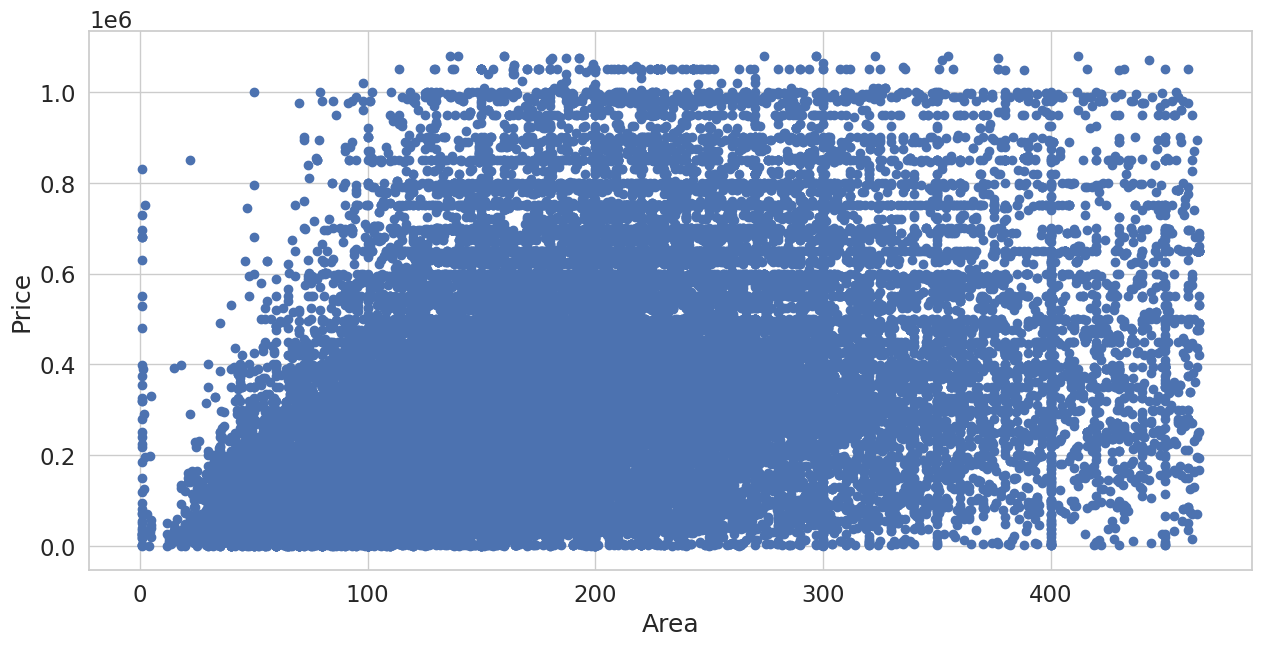

In [89]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Area'], dataset['Price'])
 
# x-axis label
ax.set_xlabel('Area')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

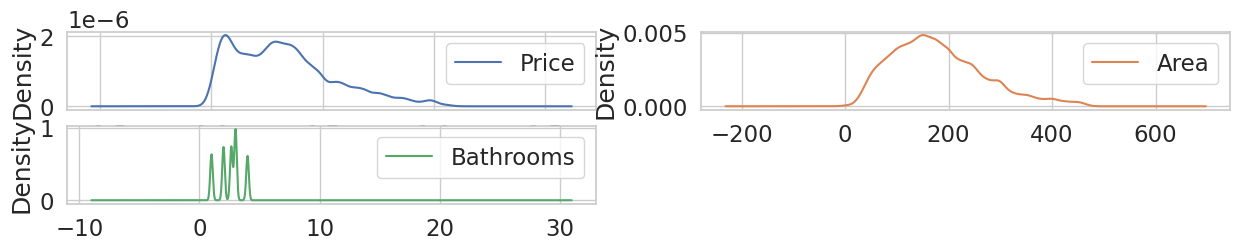

In [90]:
#Show data distribution based on density
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

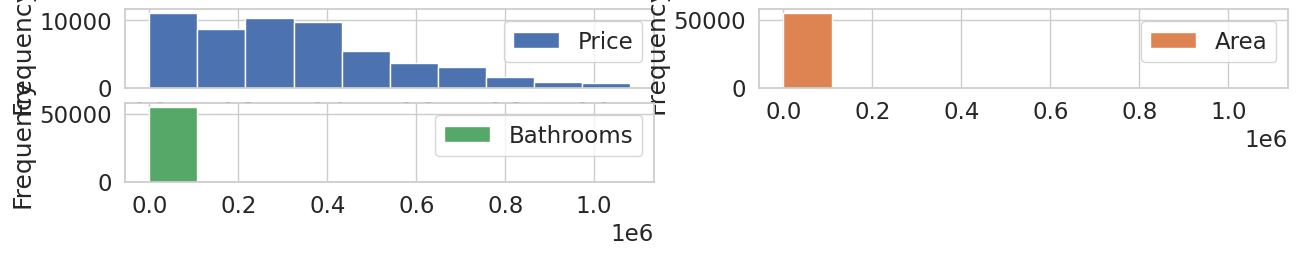

In [91]:
#Menampilkan data berdasarkan histogram
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

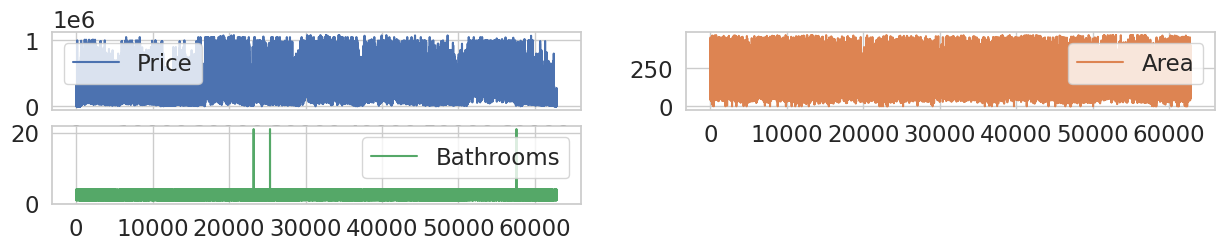

In [92]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

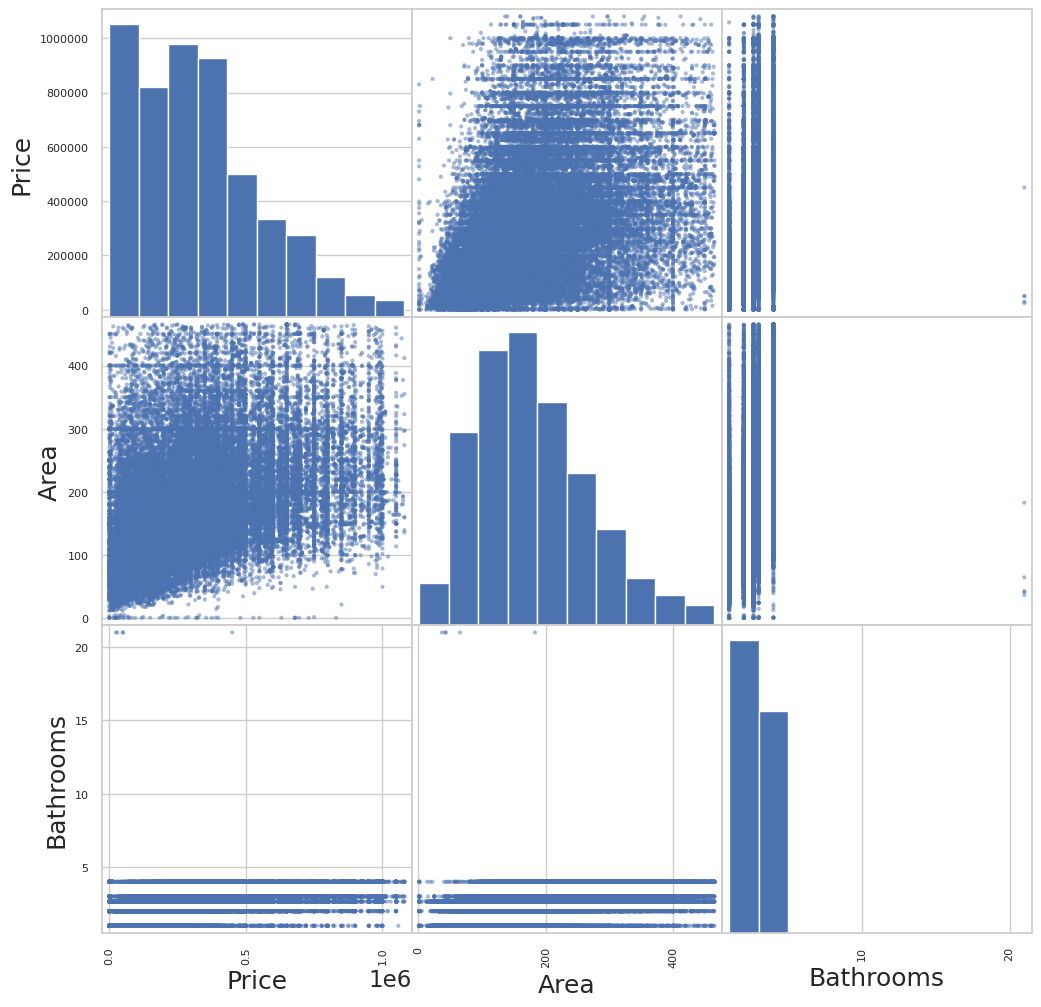

In [93]:
#Correlation Matrix
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

<ipython-input-94-e196cd769541>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


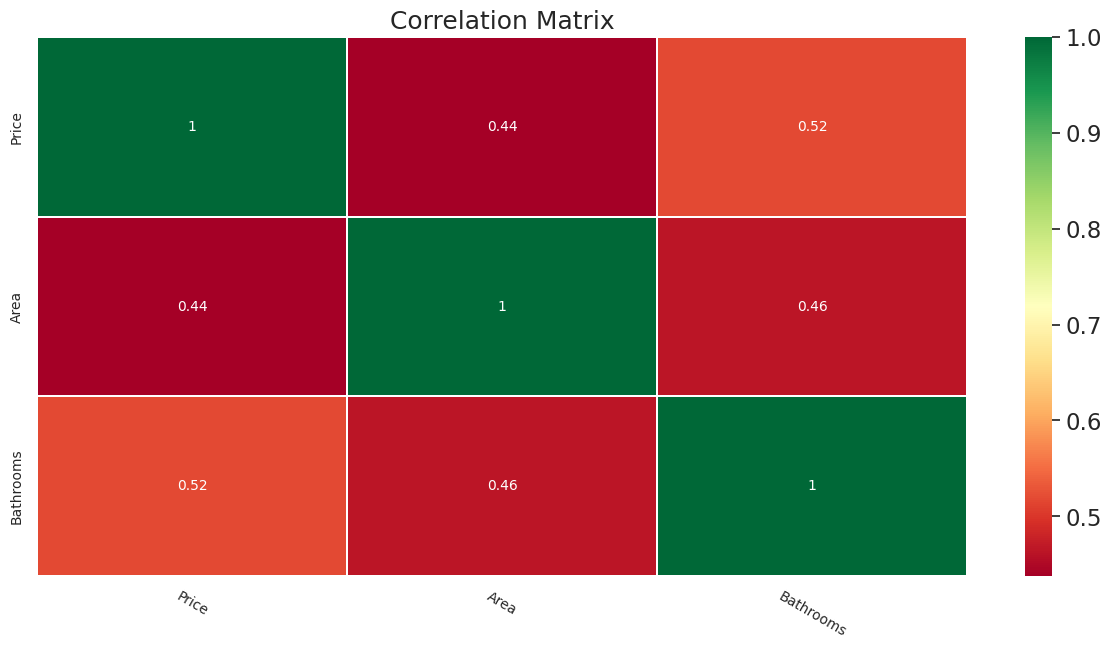

In [94]:
#Correlation Matrix with heatmap
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Splitting Dataset, menngambil sample data untuk di split

In [104]:
x = dataset.drop('AdsType', axis=1)
x

,Location,Rooms,Price,Area,Bathrooms,Condition,ProprietyType
0,"Cortegaça, Ovar, Aveiro",4,2000.0,147.0,4.0,Used,House
1,"Espinho, Aveiro",2,1100.0,146.7,2.0,Renovated,House
2,"Santa Maria da Feira, Travanca, Sanfins e Esp...",4,1200.0,134.0,2.0,Used,House
3,"Macinhata do Vouga, Águeda, Aveiro",4,2500.0,236.0,2.0,Renovated,House
4,"Ílhavo (São Salvador), Ílhavo, Aveiro",4,2000.0,258.0,3.0,Used,House
...,...,...,...,...,...,...,...
62838,"Loivo, Vila Nova de Cerveira, Viana do Castelo",4,1372.0,120.0,3.0,NaN,House
62839,"Caminha (Matriz) e Vilarelho, Caminha, Viana ...",3,777.0,400.0,4.0,NaN,House
62840,"Caminha (Matriz) e Vilarelho, Caminha, Viana ...",6,1253.0,300.0,4.0,NaN,House
62841,"Romarigães, Paredes de Coura, Viana do Castelo",1,500.0,100.0,1.0,New,House


In [105]:
#Choose Feature Type as a label
y = dataset["AdsType"]
y

0            Rent
1            Rent
2            Rent
3            Rent
4            Rent
           ...   
62838    Vacation
62839    Vacation
62840    Vacation
62841    Vacation
62842    Vacation
Name: AdsType, Length: 54897, dtype: object

In [106]:
y.values.reshape(-1,1)

array([['Rent'],
       ['Rent'],
       ['Rent'],
       ...,
       ['Vacation'],
       ['Vacation'],
       ['Vacation']], dtype=object)

Categorical Encoding

In [107]:
x = pd.get_dummies(x)
x

,Price,Area,Bathrooms,"Location_ A dos Cunhados e Maceira, Torres Vedras, Lisboa","Location_ A dos Francos, Caldas da Rainha, Leiria","Location_ A dos Negros, Óbidos, Leiria","Location_ Abade de Neiva, Barcelos, Braga","Location_ Abadim, Cabeceiras de Basto, Braga","Location_ Abambres, Mirandela, Bragança","Location_ Abaças, Vila Real",...,Rooms_7,Rooms_8,Rooms_9,Condition_In ruin,Condition_New,Condition_Renovated,Condition_To recovery,Condition_Under construction,Condition_Used,ProprietyType_House
0,2000.0,147.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1100.0,146.7,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1200.0,134.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2500.0,236.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2000.0,258.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62838,1372.0,120.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62839,777.0,400.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62840,1253.0,300.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62841,500.0,100.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [108]:
x.shape

(54897, 2690)

Standarisasi digunakan pada data yang sudah berdistribusi normal dan standar deviation equivalent to 1, mengubah atribut menjadi angka agar data ternormalisasi

In [109]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689
0,-1.419848,-0.367359,1.515176,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,1.525216,0.0
1,-1.423770,-0.370720,-0.584497,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,4.221336,-0.254403,-0.299286,-0.655645,0.0
2,-1.423334,-0.513008,-0.584497,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,1.525216,0.0
3,-1.417670,0.629779,-0.584497,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,4.221336,-0.254403,-0.299286,-0.655645,0.0
4,-1.419848,0.876263,0.465340,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,1.525216,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54892,-1.422585,-0.669861,0.465340,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,-0.655645,0.0
54893,-1.425177,2.467203,1.515176,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,-0.655645,0.0
54894,-1.423103,1.346823,1.515176,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,-0.342279,-0.236892,-0.254403,-0.299286,-0.655645,0.0
54895,-1.426384,-0.893937,-1.634333,-0.040748,-0.027003,-0.017075,-0.026663,-0.008536,-0.007393,-0.007393,...,-0.094509,-0.066679,-0.047772,-0.06182,2.921591,-0.236892,-0.254403,-0.299286,-0.655645,0.0


Normalisasi 

In [110]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689
0,0.001746,0.314655,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000912,0.314009,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.001005,0.286638,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002209,0.506466,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.001746,0.553879,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54892,0.001164,0.256466,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54893,0.000613,0.859914,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54894,0.001054,0.644397,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54895,0.000357,0.213362,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#Splitting data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, train_size=0.8, random_state=1, stratify=y)

In [112]:
from collections import Counter
print("Train distribution", Counter(xTrain))
print("Test distribution", Counter(xTest))

Train distribution Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 13

In [113]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [114]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.992144 (0.000978)


In [115]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [117]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9918943533697632


[[   39    60     5]
 [    2 10814     0]
 [    6    16    38]]


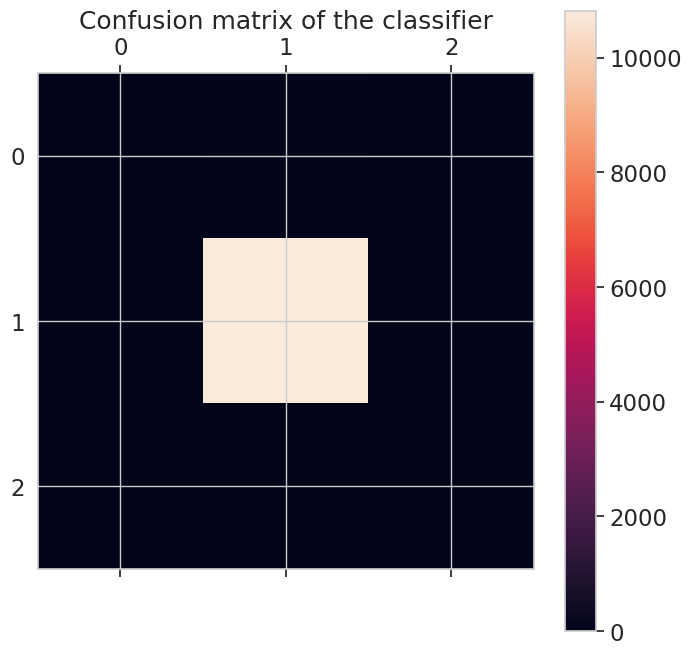

In [118]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [119]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

        Rent       0.83      0.38      0.52       104
        Sell       0.99      1.00      1.00     10816
    Vacation       0.88      0.63      0.74        60

    accuracy                           0.99     10980
   macro avg       0.90      0.67      0.75     10980
weighted avg       0.99      0.99      0.99     10980



Dari data diatas didapatkan data berupa precision recall f1-score dan support